In [1]:
from ROOT import TFile, TCanvas, TLegend, TLatex
from Plotter.PlotterTools.Kinematics import Kinematics

Welcome to JupyROOT 6.22/08


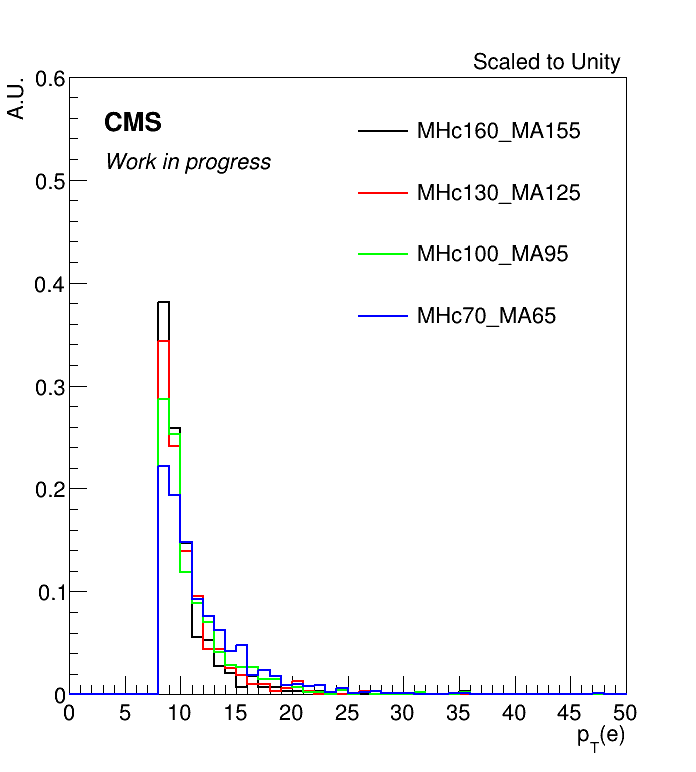

In [2]:
# get histograms
masspoints = ["MHc160_MA155", "MHc130_MA125", "MHc100_MA95", "MHc70_MA65"]
hists = dict()

for point in masspoints:
    path = "/root/workspace/HcToWA/Samples/SignalStudy/2017/Skim1E2Mu__BaseID__/"
    f = TFile(path + "SignalStudy_TTToHcToWA_AToMuMu_"+point+".root")
    h = f.Get("1e2mu/electrons_offshellW/1/pt")
    hists[point] = h.Clone(point+"_offshell_ele_pt")
    hists[point].SetDirectory(0)
    f.Close()

leg = TLegend(0.50, 0.55, 0.90, 0.87)
leg.SetFillStyle(0)
leg.SetBorderSize(0)

info = TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = TLatex()
extra_logo = TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)


cvs = TCanvas("cvs", "cvs", 700, 800)
cvs.cd()
_color = 1
for name, hist in hists.items():
    hist.Scale(1./hist.Integral())
    hist.GetXaxis().SetRangeUser(0., 50.)
    hist.GetXaxis().SetTitle("p_{T}(e)")
    hist.GetYaxis().SetRangeUser(0., 0.6)
    hist.GetYaxis().SetTitle("A.U.")
    hist.GetYaxis().SetTitleOffset(1.41)
    hist.SetStats(0)
    hist.SetLineColor(_color)
    hist.SetLineWidth(2)
    leg.AddEntry(hist, name, 'l')
    _color += 1
    hist.Draw("hist&same")
leg.Draw("same")
info.DrawLatexNDC(0.68, 0.91, "Scaled to Unity")
logo.DrawLatexNDC(0.15, 0.83, "CMS")
extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
cvs.Draw()
